# Advanced SQL: Surfs Up!!

In [146]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [147]:
import numpy as np
import pandas as pd

In [148]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [149]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [150]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [151]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [152]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [153]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [154]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [155]:
# Display the names of columns (and first values) for Measurement Class.
first_measurement = session.query(Measurement).first()
first_measurement.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x12638c048>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [156]:
# Select only the 'date' and 'prcp' values.
# Load the query results into a Pandas DataFrame and set the index to the date column
conn = engine.connect()
data = pd.read_sql("SELECT date, prcp FROM measurement", conn)

# See the shape and number of values.
print(data.shape)
print(data.count())

# Preview the first rows of the DataFrame
data.head()

(19550, 2)
date    19550
prcp    18103
dtype: int64


,date,prcp
0,2010-01-01,0.08
1,2010-01-02,0.00
2,2010-01-03,0.00
3,2010-01-04,0.00
4,2010-01-06,NaN


In [157]:
# Preview the last rows of DataFrame
data.tail()

,date,prcp
19545,2017-08-19,0.09
19546,2017-08-20,NaN
19547,2017-08-21,0.56
19548,2017-08-22,0.50
19549,2017-08-23,0.45


In [158]:
data.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


# Instructions: Precipitation Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results
* Calculate the date 1 year ago from the last data point in the database DONE
* Perform a query to retrieve the data and precipitation scores
* Save the query results as a Pandas DataFrame and set the index to the date column
* Sort the dataframe by date
* Use Pandas to calcualte the summary statistics for the precipitation data
* Use Pandas Plotting with Matplotlib to plot the data

In [159]:
# Total dates
session.query(func.count(Measurement.date)).all()

[(19550)]

In [160]:
# Latest Date
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print("Latest Date: ", latest_date[0])

Latest Date:  2017-08-23


In [229]:
# Calculate the date 12 months before `Latest Date` using the datetime library
query_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print("Query Date: ", query_date)

Query Date:  2016-08-23


In [162]:
# Perform a query to retrieve the data and precipitation scores
query_measurement = session.query(Measurement.date, Measurement.prcp).\
                    filter(Measurement.date >= query_date).\
                    order_by(Measurement.date).all()
#query_measurement # Uncomment to show query results normal format.

In [163]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query_measurement_df = pd.DataFrame(query_measurement, columns=['Date', 'Precipitation'])
print(query_measurement_df.count())
query_measurement_df.head()

Date             2230
Precipitation    2021
dtype: int64


,Date,Precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [233]:
# Sort the DataFrame values by 'date'.
query_measurement_df = query_measurement_df.sort_values(by=['Date'])
query_measurement_df.head()
# Set index to the Date
query_high_station_df.set_index('Date').head()

,Precipitation,Temperature
Date,,
2016-08-23,1.79,77.0
2016-08-24,2.15,77.0
2016-08-25,0.06,80.0
2016-08-26,0.01,80.0
2016-08-27,0.12,75.0


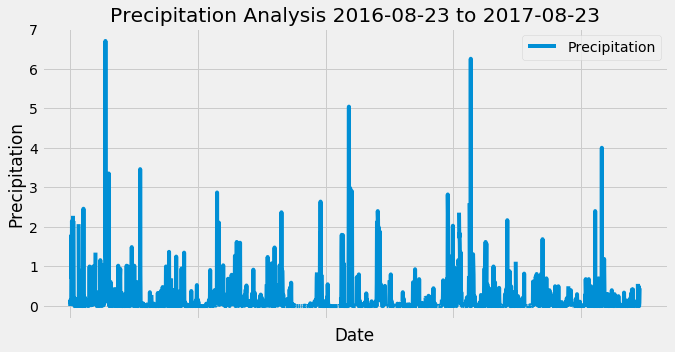

In [264]:
# Plot the results using the DataFrame `plot` method.
query_measurement_df.plot('Date', 'Precipitation', figsize=(10,5))
#ax.set_ylabel('frequency')
plt.title(f'Precipitation Analysis {query_date} to {latest_date[0]}')
plt.ylabel('Precipitation')
plt.savefig("Outputs/Precipitation.jpeg")
plt.show()

In [235]:
# Print the summary statistics for the precipitation data
query_measurement_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [236]:
# See the max value for comparison.
query_measurement_df['Precipitation'].max()

6.7

# Instructions: Station Analysis
* Design a query to show how many stations are available in this dataset.
* What are the most active stations? (i.e. what stations have the most rows)?
    * List the stations and the counts in descending order.
* Using the station id from the previous query, calculate the lowest temperature recorded, highest temperature recorded, and average temperature most active station.
* Choose the station with the highest number of temperature observations.
    * Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [177]:
# Display the names of columns (and first values) for Station Class
first_station = session.query(Station).first()
first_station.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x126ccf748>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [178]:
# Design a query to show how many stations are available in this dataset?
stations_available = session.query(Measurement).group_by(Measurement.station).count()
#stations_available = session.query(func.count(Station.id)).all()
stations_query = session.query(Station.name, Station.station).all()

print("There are {} stations available.".format(stations_available))
stations_query

There are 9 stations available.


[('WAIKIKI 717.2, HI US', 'USC00519397'),
 ('KANEOHE 838.1, HI US', 'USC00513117'),
 ('KUALOA RANCH HEADQUARTERS 886.9, HI US', 'USC00514830'),
 ('PEARL CITY, HI US', 'USC00517948'),
 ('UPPER WAHIAWA 874.3, HI US', 'USC00518838'),
 ('WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523'),
 ('WAIHEE 837.5, HI US', 'USC00519281'),
 ('HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918'),
 ('MANOA LYON ARBO 785.2, HI US', 'USC00516128')]

In [179]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_count = func.count(Measurement.station)
session.query(Measurement.station, station_count).group_by(Measurement.station).order_by(station_count.desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [180]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                filter(Measurement.station == 'USC00519281').first()

#session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).first()

(54.0, 85.0, 71.66378066378067)

In [181]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station (query_date)
query_high_station = session.query(Measurement.date, Measurement.prcp, Measurement.tobs).\
                                filter(Measurement.date >= query_date).\
                                filter(Measurement.station == 'USC00519281').all()

query_high_station_df = pd.DataFrame(query_high_station, columns=['Date', 'Precipitation', 'Temperature'])
print(query_high_station_df.count())
query_high_station_df.head()

Date             352
Precipitation    352
Temperature      352
dtype: int64


,Date,Precipitation,Temperature
0,2016-08-23,1.79,77.0
1,2016-08-24,2.15,77.0
2,2016-08-25,0.06,80.0
3,2016-08-26,0.01,80.0
4,2016-08-27,0.12,75.0


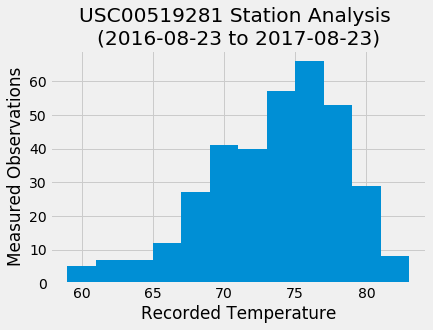

In [263]:
# Plot the results as a histogram
plt.hist(query_high_station_df['Temperature'],12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Measured Observations")
plt.title(f"USC00519281 Station Analysis \n({query_date} to {latest_date[0]})")
plt.savefig("Outputs/Most Active Station Analysis.jpeg")
plt.show()
# Show legend

# Instructions: Temperature Analysis

* The starter notebook contains a function called `calc_temps` that will accept a start date and end date in the format `%Y-%m-%d` and return the minimum, average, and maximum temperatures for that range of dates.
* Use the `calc_temps` function to calculate the min, avg, and max temperatures for your trip using the matching dates from the previous year (i.e., use "2017-01-01" if your trip start date was "2018-01-01").
* Plot the min, avg, and max temperature from your previous query as a bar chart.
* Use the average temperature as the bar height.
* Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr).

## <font color=green>First Considerations for Temperature Analysis</font> 

* Chosen start date: 20/July ; end date: 7/Ago
* Then, we take the recorded values in the DB, so we take 2017 as reference.

In [191]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2017-02-28', '2017-03-05'))

[(64.0, 72.02777777777777, 78.0)]


In [203]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
#print(calc_temps('2017-07-20', '2017-08-07'))
temperatures = calc_temps('2017-07-20', '2017-08-07')
min_temp = temperatures[0][0]
avg_temp = temperatures[0][1]
max_temp = temperatures[0][2]
print(temperatures)

[(72.0, 78.91428571428571, 84.0)]


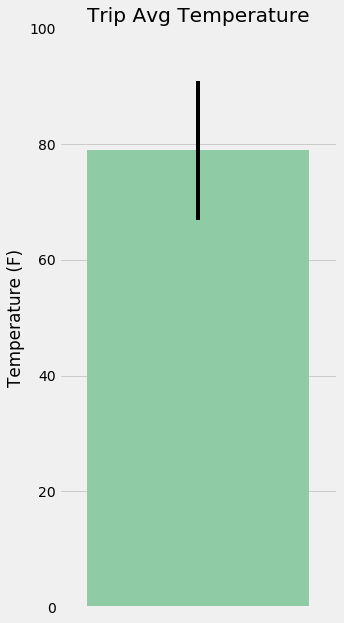

In [265]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
p2p = max_temp - min_temp

# Plot
fig, ax = plt.subplots(figsize=(5,9))
ax.bar(1, avg_temp, color='#8fcca5', yerr=p2p)
ax.set_ylabel("Temperature (F)")
ax.set_title("Trip Avg Temperature")

plt.ylim(0, 100)
plt.xlim(0.5,1.5)
fig.tight_layout()
ax.axes.get_xaxis().set_visible(False)
plt.savefig("Outputs/Trip Avg Temp.jpeg")
plt.show()